# Tidy Data Project
The purpose of this project is to apply the principles of tidy data to a messy dataset and demonstrate how tidy data can be easily used for data analysis and visualization.

The dataset used contains information about the Olympic Medalists from 2008 and was adapted from [this dataset](https://edjnet.github.io/OlympicsGoNUTS/2008/) authored by Giorgio Comai for EDJNet.

## Tidy Data
This project is based on the principles of tidy data outlined by [Hadley Wickham](https://vita.had.co.nz/papers/tidy-data.pdf), namely:
- Each variable must form a column.
- Each observation must form a row.
- Each type of observational unit must form a table.

In [191]:
# import necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from highlight_text import ax_text, fig_text

In [192]:
# read in the data
df = pd.read_csv("olympics_08_medalists.csv")

# view first observations of dataframe
df.head()

,medalist_name,male_archery,female_archery,male_athletics,female_athletics,male_badminton,female_badminton,male_baseball,male_basketball,female_basketball,...,female_beach volleyball,male_volleyball,female_volleyball,male_water polo,female_water polo,male_weightlifting,female_weightlifting,male_freestyle wrestling,female_freestyle wrestling,male_greco-roman wrestling
0,Aaron Armstrong,NaN,NaN,gold,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Peirsol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abdullo Tangriev,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abeer Abdelrahman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,bronze,NaN,NaN,NaN
4,Abhinav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning and Tidying
As we can see above, this dataframe is not organized in a tidy manner. Each instance of a sport associated with a gender is a separate column. This means that not only do we have values as column headers (e.g. "male" and "female", which are values of the variable "gender"), but we also have two variables combined (gender and sport).

It is important to clean and tidy up this dataframe so that it follows a standard data structure with each variable in a column and each observation in a row. This will ensure that anyone can easily use this dataframe for aggregations and analyses. In addition, a tidy dataframe will be compatible with most tools used for data analysis.

This [Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may be a useful tool to reference unfamiliar methods as you navigate through my project.

### Step 1: Convert dataframe from wide to long format
- Transform this dataframe so that each instance of a sport associated with a gender is a value within a column for "sport".

In [193]:
# create a copy of the original dataframe
df_medals = df.copy()

# reorganize dataframe so that each variable is in a separate column
df_medals = pd.melt(df_medals,
                    id_vars=["medalist_name"],
                    value_vars=df_medals.columns[1:],
                    var_name="sport",
                    value_name="medal")

# view first observations of dataframe
df_medals.head()

,medalist_name,sport,medal
0,Aaron Armstrong,male_archery,NaN
1,Aaron Peirsol,male_archery,NaN
2,Abdullo Tangriev,male_archery,NaN
3,Abeer Abdelrahman,male_archery,NaN
4,Abhinav,male_archery,NaN


As we can see above, the "sport" column still contains two variables: gender and sport. In addition, now we have several observations with null values.

### Step 2: Split column with multiple variables and clean null data
- Split the "sport" column into "gender" and "sport".
- Remove rows with null data.

In [194]:
# split sport column so that each variable within it has its own column
df_medals[["gender", "sport"]] = df_medals["sport"].str.split("_", expand = True)

# drop rows containing null data
df_medals = df_medals.dropna()

# view first observations of dataframe
df_medals.head()

,medalist_name,sport,medal,gender
177,Bair Badënov,archery,bronze,male
676,Ilario Di Buò,archery,silver,male
682,Im Dong-hyun,archery,gold,male
760,Jiang Lin,archery,bronze,male
920,Lee Chang-hwan,archery,gold,male


In [195]:
df_medals.shape

(1875, 4)

## Tidy Data Applications
Now that the dataframe is clean and in a tidy format, we can use it for several applications in analysis. As stated by [Hadley Wickham](https://vita.had.co.nz/papers/tidy-data.pdf), tidy data allows us to use simple "tidy tools" for three important elements of analysis: **manipulation**, **visualization**, and **modeling**.

Here, I will demonstrate a few possible uses for exploratory data visualization and manipulation.

First, I will use a simple aggregation and sorting (forms of data manipulation) and create a lollipop chart to see how many medals were awarded for each sport in the 2008 Olympics. This basic step of exploratory data analysis that was made possible by converting my dataframe into a tidy format.

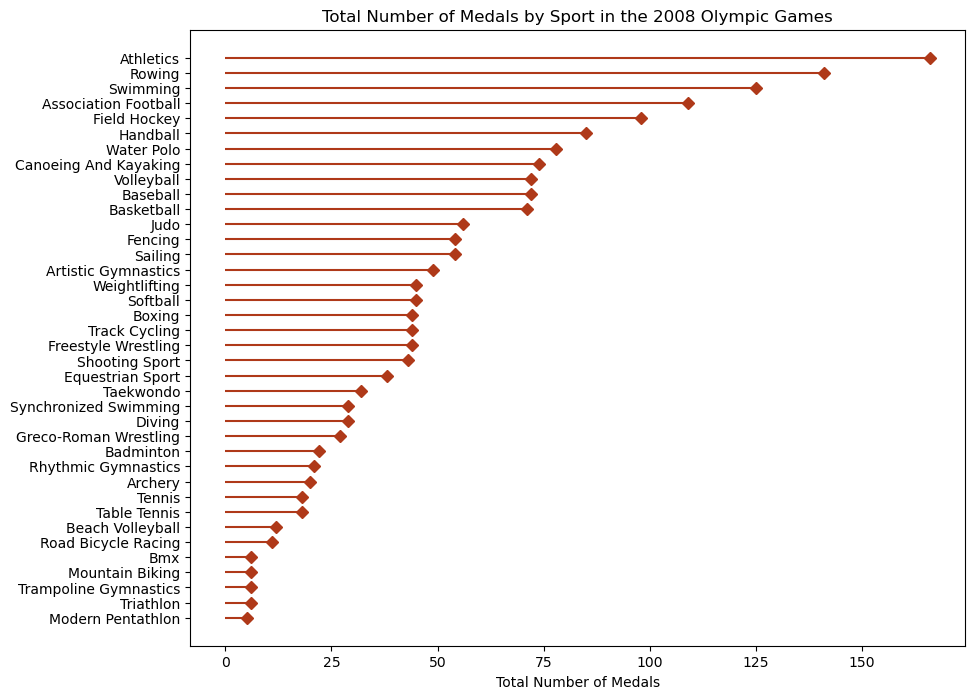

In [196]:
# create dataframe with the number of medals awarded in each sport
sport_counts = (df_medals
                .groupby(["sport"])
                .size()
                .reset_index(name="count")
                .sort_values(by="count")) # order by medal counts

# use title capitalization for the sports column
sport_counts["sport"] = sport_counts["sport"].str.title()

# create a range for the number of sports in the dataframe
sport_range = range(sport_counts["sport"].nunique())

# create a figure
plt.figure(figsize=(10,8))

# add horizontal lines for the medal counts for each sport
plt.hlines(y=sport_range,
           xmin=0,
           xmax=sport_counts["count"],
           color="#AF3919")

# add diamond-shaped data points for the medal counts for each sport
plt.plot(sport_counts["count"],
         sport_range,
         "D",
         color="#AF3919")

# add the names of the sports to the ticks
plt.yticks(sport_range,
           sport_counts["sport"])

# add x label and title
plt.xlabel("Total Number of Medals")
plt.title("Total Number of Medals by Sport in the 2008 Olympic Games")

# view plot
plt.show()

This plot reveals an expected pattern: sports with several events, such as Athletics and Swimming, and team sports, such as Association Football and Field Hockey, had the largest amounts of medals awarded.

Now, I will use a simple aggregation to count the total amount of medals received by each gender, split by medal type. I will use this to create a grouped bar plot that will allow us to see how many medals of each type were awarded to female and male athletes.

([<matplotlib.axis.XTick at 0x30e5bc290>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

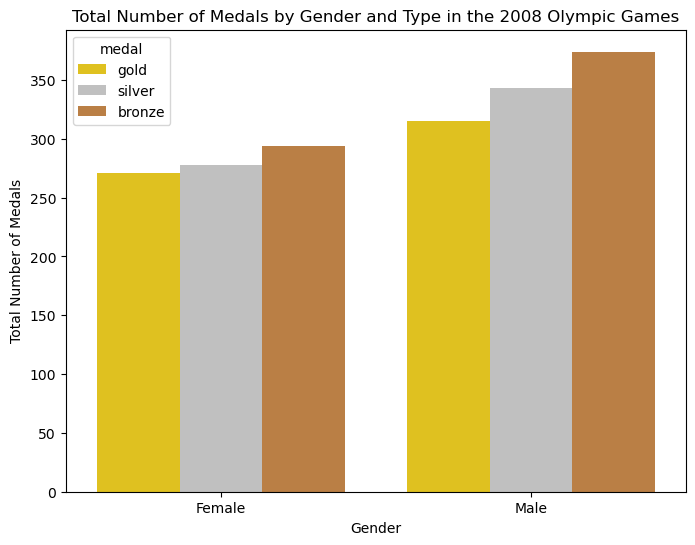

In [197]:
# aggregate data by gender and medal type
medal_counts = (df_medals
                .groupby(["medal", "gender"])
                .size()
                .reset_index(name="count"))

# create a custom palette for medals for plotting
medal_palette = {
    "gold" : "#FFD700",
    "silver" : "#C0C0C0",
    "bronze" : "#CD7F32"
}

# create a grouped bar plot for medals grouped by gender
plt.figure(figsize=(8, 6))
sns.barplot(data=medal_counts,
            x="gender",
            y="count",
            hue="medal",
            hue_order=["gold", "silver", "bronze"],
            palette=medal_palette)

# customize plot labels and title
plt.title("Total Number of Medals by Gender and Type in the 2008 Olympic Games")
plt.ylabel("Total Number of Medals")
plt.xlabel("Gender")
plt.xticks(ticks=[0,1], labels=["Female", "Male"])

This visualization shows us that female and male athletes followed the same trend, receiving more silver than gold medals and more bronze than silver medals. However, male athletes received more of each type of medal than females. This leads to the question: which sports had the most different distributions of medals between males and females?

To explore this question and present the data in a way that answers it more clearly, we can apply a pivot table technique to our tidy dataframe.

### Summarizing Tidy Data with Pivot Tables
Pivot tables can be a useful way to aggregate data for analysis, especially when the data contains duplicates. Here, for example, multiple medalists are associated with the same sport. Thus, I can use a pivot table to count how many medals were received in each sport using an aggregation function. I chose to use the values for "gender" as the new columns to separate the medal counts by gender.

In [198]:
# aggregate data to count number of medals by sport, gender, and medal type
df_sport = pd.pivot_table(df_medals,
                          index="sport",
                          columns="gender",
                          values="medal",
                          aggfunc="value_counts")

# view first rows of the pivot table
df_sport.head(12)

gender                       female  male
sport                medal               
archery              bronze     4.0   4.0
                     gold       2.0   3.0
                     silver     3.0   4.0
artistic gymnastics  bronze     7.0  12.0
                     gold       7.0   7.0
                     silver     6.0  10.0
association football bronze    18.0  18.0
                     gold      18.0  19.0
                     silver    18.0  18.0
athletics            bronze    26.0  29.0
                     gold      27.0  25.0
                     silver    28.0  31.0

Even though this new dataframe is not tidy, it is useful for analysis. For example, I can use it to see how many medals each gender won for each sport. Pivot tables can be great for presenting data to stakeholders with more summarized and straightforward conclusions.

Now, I will use the pivot table to create another visualization: a dumbell plot with the percentages of medals that were received by female and male athletes for each sport. First, I will add a few columns to my new pivot table to calculate these percentages.

In [199]:
# sum the total amount of medals for each sport and gender
df_sport_medal = df_sport.groupby("sport")[["female","male"]].sum()

# create a column with the total number of medals for each sport
df_sport_medal["total"] = df_sport_medal[["female","male"]].sum(axis=1)

# create columns for the percentage of medals for each gender
df_sport_medal["female_perc"] = df_sport_medal["female"] / df_sport_medal["total"]
df_sport_medal["male_perc"] = df_sport_medal["male"] / df_sport_medal["total"]

# reset multi index to single index to use df for visualization
df_sport_medal = df_sport_medal.reset_index()

# view first observations of the dataframe
df_sport_medal.head()

gender,sport,female,male,total,female_perc,male_perc
0,archery,9.0,11.0,20.0,0.450000,0.550000
1,artistic gymnastics,20.0,29.0,49.0,0.408163,0.591837
2,association football,54.0,55.0,109.0,0.495413,0.504587
3,athletics,81.0,85.0,166.0,0.487952,0.512048
4,badminton,10.0,12.0,22.0,0.454545,0.545455


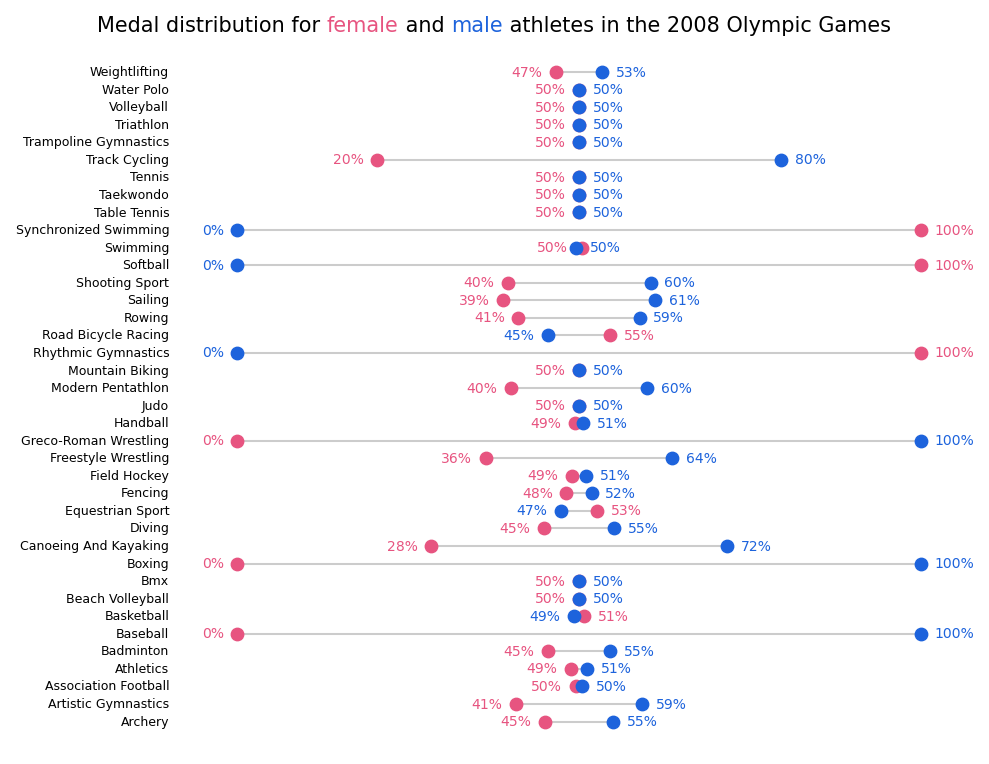

In [200]:
## dumbell plot of medal distribution for female and male athletes

# create a new figure for the total amount of medals by gender
fig, ax = plt.subplots(figsize=(10,8))

# define colors for easy visualization
color_female, color_male = "#E75480", "#1D63DC"

# create range for number of unique sports in the df
my_range = range(df_sport_medal["sport"].nunique())

# plot horizontal lines for each sport
ax.hlines(y=my_range,
          xmin=df_sport_medal["female_perc"],
          xmax=df_sport_medal["male_perc"],
          color="grey",
          alpha=0.4)

# plot data points for each sport and gender
ax.scatter(df_sport_medal["female_perc"],
           my_range,
           color=color_female,
           zorder=2,
           s=80)
ax.scatter(df_sport_medal["male_perc"],
           my_range,
           color=color_male,
           zorder=2,
           s=80)

# add names of sports and percentages of medal distribution
for i in my_range:

    # for females
    females = df_sport_medal["female_perc"][i]

    # place percentage to the left if it is up to 50%
    if females <= 0.504:
        ax_text(
            females-0.02, i,
            f"<{df_sport_medal["female_perc"][i]*100:.0f}%>",
            ha="right", va="center",
            highlight_textprops=[
                {"color" : color_female,
                "weight" : "light"}
            ]
        )

    # place percentage to the right if it is more than 50%
    else:
        ax_text(
            females+0.02, i,
            f"<{df_sport_medal["female_perc"][i]*100:.0f}%>",
            ha="left", va="center",
            highlight_textprops=[
                {"color" : color_female,
                "weight" : "light"}
            ]
        )

    # for males
    males = df_sport_medal["male_perc"][i]

    # place percentage to the right if it is more than 50%
    if males > 0.495:
        ax_text(
            males+0.02, i,
            f"<{df_sport_medal["male_perc"][i]*100:.0f}%>",
            ha="left", va="center",
            highlight_textprops=[
                {"color" : color_male,
                "weight" : "light"}
            ]
        )

    # place percentage to the left if it is up to 50%
    else:
        ax_text(
            males-0.02, i,
            f"<{df_sport_medal["male_perc"][i]*100:.0f}%>",
            ha="right", va="center",
            highlight_textprops=[
                {"color" : color_male,
                "weight" : "light"}
            ]
        )

    # add sports names to the left
    sport_name = df_sport_medal["sport"][i].title() # using title capitalization
    ax_text(-0.1, i,
            f"<{sport_name}>",
            ha="right", va="center",
            highlight_textprops=[
                {"color" : "black",
                 "weight" : "light",
                 "size" : 9}
            ])

# add centralized title
text = "Medal distribution for <female> and <male> athletes in the 2008 Olympic Games"
fig_text(
    0.5, 0.93,
    text,
    fontsize=15,
    ha="center", va="center",
    highlight_textprops=[
        {"color" : color_female},
        {"color" : color_male}
    ]
)

# remove axis
ax.set_axis_off()

# set layout
plt.tight_layout()

# show plot
plt.show()

This exploratory data visualization begins to answer our question. Out of the 38 sports in the dataset, 13 had an equal amount of medals awarded to female and male athletes. Male athletes received more medals in 19 of these sports, which accounts for half of all sports included. This likely explains why we observed that male athletes received more of each type of medal than female athletes.

## Final Remarks
In this project, I have demonstrated the importance of tidying up data before an analysis according to [Hadley Wickham's](https://vita.had.co.nz/papers/tidy-data.pdf) framework. With simple steps, I was able to transform a messy dataframe into a tidy one, following a standard data structure. This allowed me to apply several methods to analyze and visualize my data using different packages.

In addition, I have shown how reshaping and aggregating tidy data may be useful to easily highlight different conclusions in tables and visualizations.